<a href="https://colab.research.google.com/github/zhrnnsw/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 12 - Feature Matching, Face Detection, Face Tracking**

---


> Nama: Zahra Annisa Wahono
>
> Kelas: 3H-TI / 29
>
> NIM: 2141720016

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Face Detection untuk image object lain yang tersedia pada (/images/facedet).**

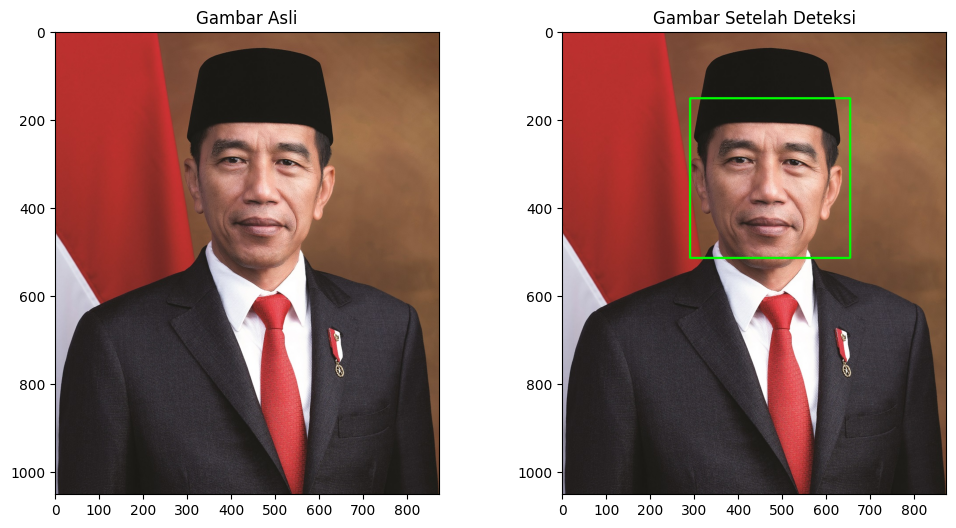

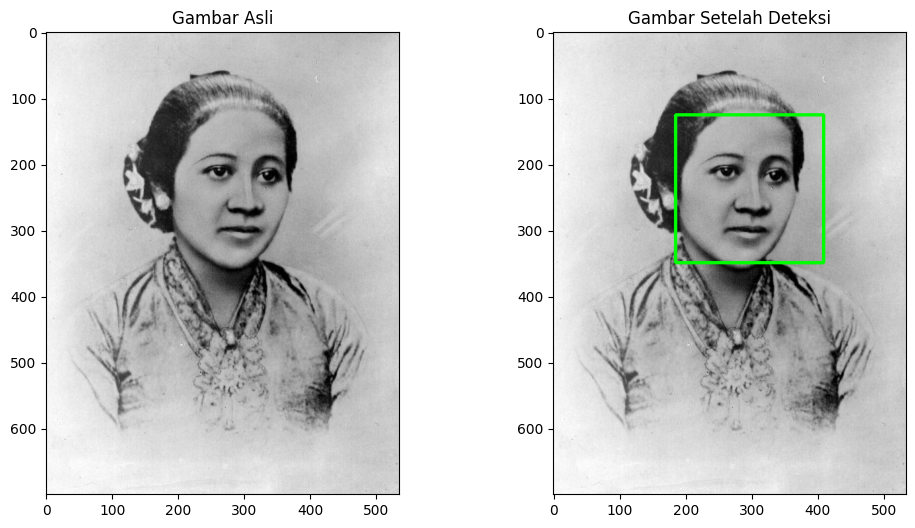

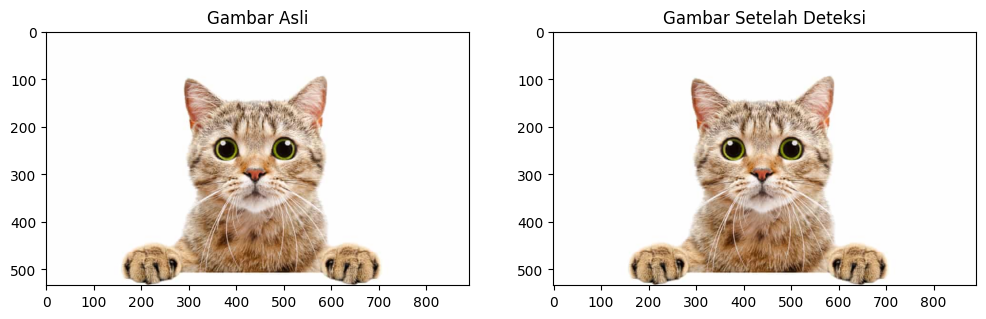

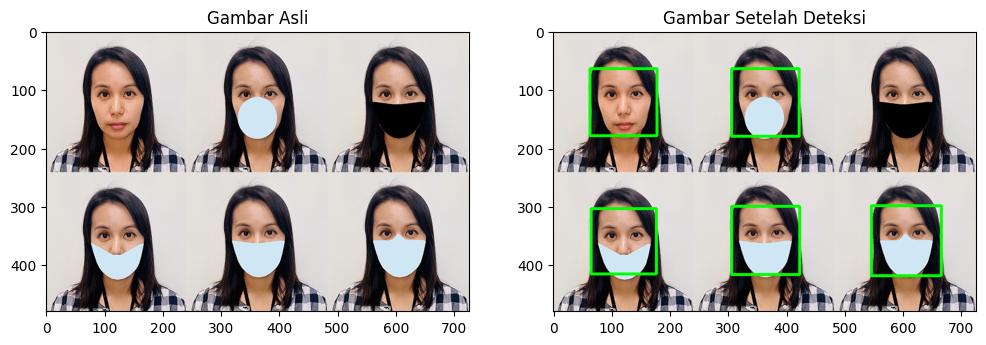

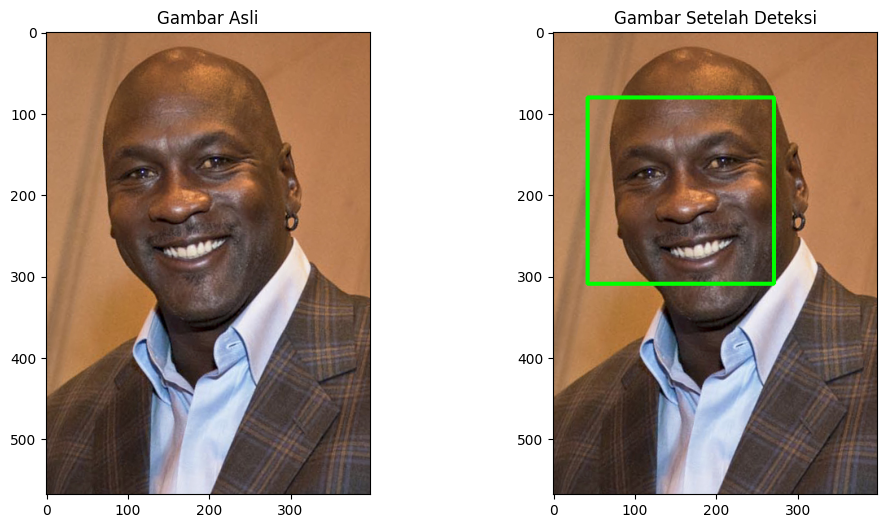

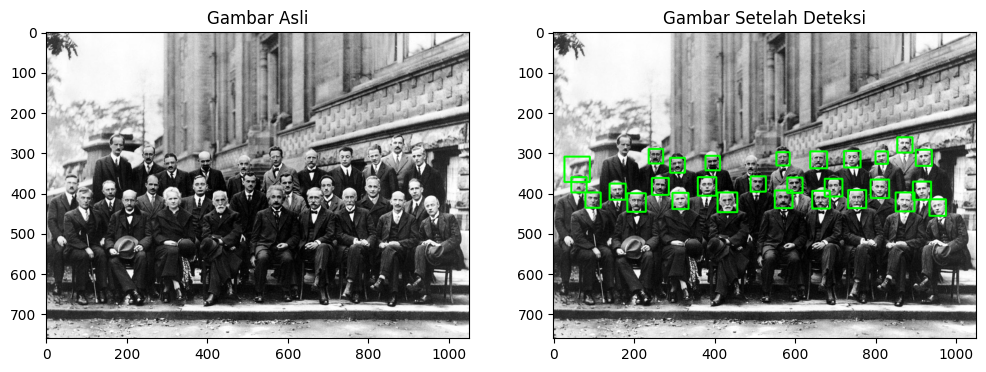

In [5]:
import cv2
import matplotlib.pyplot as plt

# Inisialisasi classifier wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 5/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

# Fungsi untuk menampilkan gambar dengan kotak di sekitar wajah
def display_image_with_faces(image_path, cascade_classifier):
    img = cv2.imread(image_path)

    if img is not None:

        # Deteksi wajah
        roi_wajah = cascade_classifier.detectMultiScale(img)

        # Tampilkan gambar asli
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Gambar Asli')

        # Gambar kotak di sekitar wajah pada gambar setelah deteksi
        for (x, y, w, h) in roi_wajah:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

        img_kotak = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
        # Tampilkan gambar setelah deteksi
        plt.subplot(1, 2, 2)
        plt.imshow(img_kotak)
        plt.title('Gambar Setelah Deteksi')

        plt.show()
    else:
        print("Gagal membaca gambar atau gambar tidak ada.")

# Jokowi
display_image_with_faces('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/jokowi.jpg', cascade_wajah)

# RA.Kartini
display_image_with_faces('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/kartini.jpg', cascade_wajah)

# Kucing
display_image_with_faces('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/kucing.jpg', cascade_wajah)

# Perempuan Maskeran
display_image_with_faces('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/mask.png', cascade_wajah)

# M. Jordan
display_image_with_faces('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/mjordan.jpg', cascade_wajah)

# Kelompok
display_image_with_faces('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/solvayconf.jpg', cascade_wajah)


# **Deteksi Wajah Kucing**

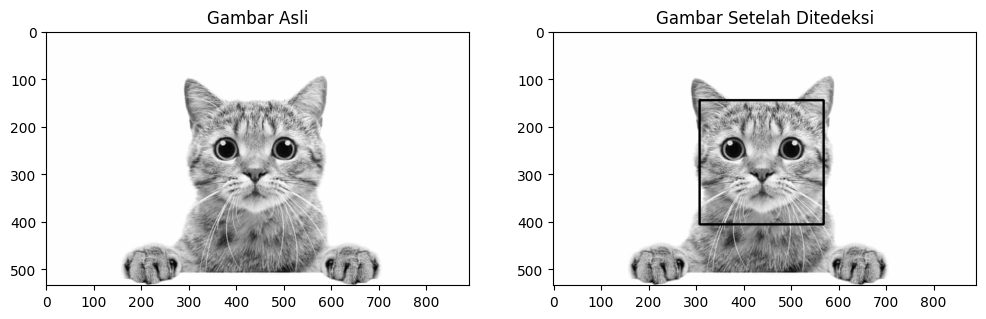

In [7]:
import cv2
import matplotlib.pyplot as plt

cascade_cat = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 5/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml')

kucing = cv2.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/kucing.jpg', 0)

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(kucing, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Asli')

# mendeteksi wajah
roi_wajah = cascade_cat.detectMultiScale(kucing)

for (x,y,w,h) in roi_wajah:
  cv2.rectangle(kucing,(x,y),(x+w,y+h),(0,255,0),3)
  break

kucing_kotak = cv2.cvtColor(kucing, cv2.COLOR_BGRA2RGB)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(kucing_kotak, cv2.COLOR_BGR2RGB))
plt.title('Gambar Setelah Ditedeksi')
plt.show()

## **Eye Detection**

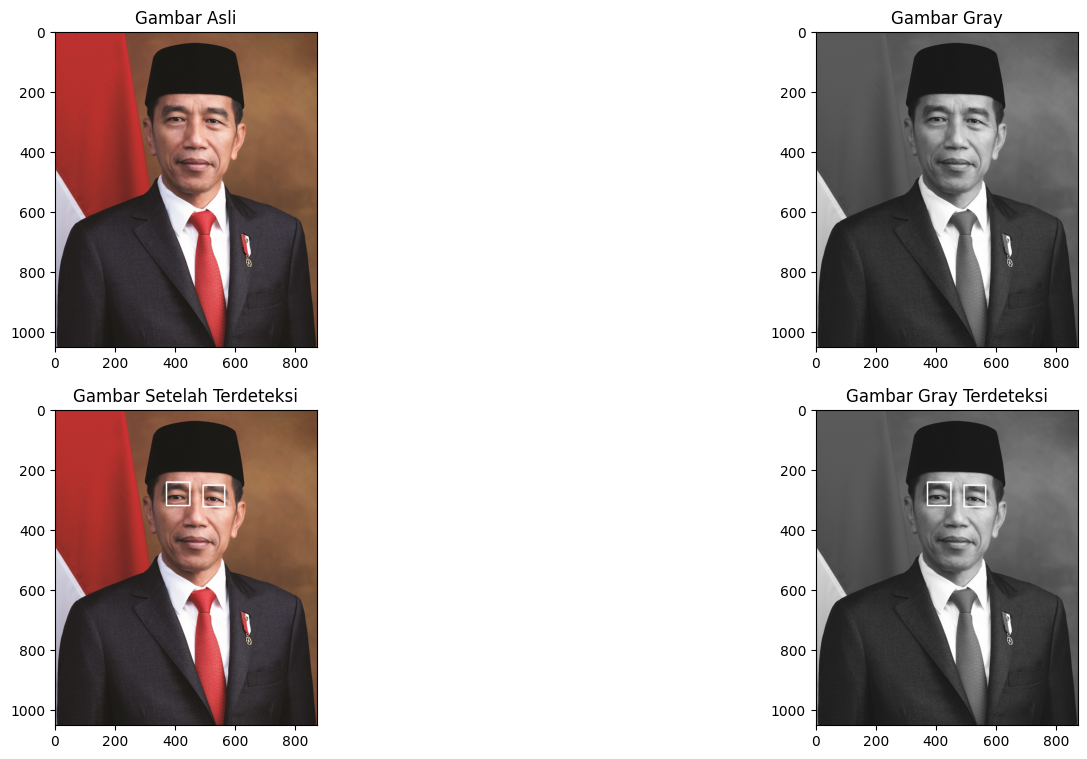

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the eye detection classifiers
cascade_lefteye = cv.CascadeClassifier('/content/drive/MyDrive/Semester 5/PCVK/Images/haarcascades/haarcascade_lefteye_2splits.xml')
cascade_righteye = cv.CascadeClassifier('/content/drive/MyDrive/Semester 5/PCVK/Images/haarcascades/haarcascade_righteye_2splits.xml')

# Read the input image
jokowi = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/jokowi.jpg')
jokowi_ori = jokowi.copy()


plt.figure(figsize=(18, 9))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(jokowi_ori, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Asli')

jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)

# Detect eyes
roi_lefteye = cascade_lefteye.detectMultiScale(jokowi_gray)
roi_righteye = cascade_righteye.detectMultiScale(jokowi_gray)

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(jokowi_gray, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Gray')

# Membuat kotak untuk mendeteksi mata (gambar gray)
for (x, y, w, h) in roi_lefteye:
    cv.rectangle(jokowi_gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break
for (x, y, w, h) in roi_righteye:
    cv.rectangle(jokowi_gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(jokowi_gray, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Gray Terdeteksi')

# Membuat kotak untuk mendeteksi mata (gambar gray)
for (x, y, w, h) in roi_lefteye:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break
for (x, y, w, h) in roi_righteye:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)
    break

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(jokowi, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Setelah Terdeteksi')
plt.show()

## **Face Tracking**

In [12]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))

  return bbox_to_bytes

In [13]:
cascade_face = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_alt.xml")

In [14]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = cascade_face.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


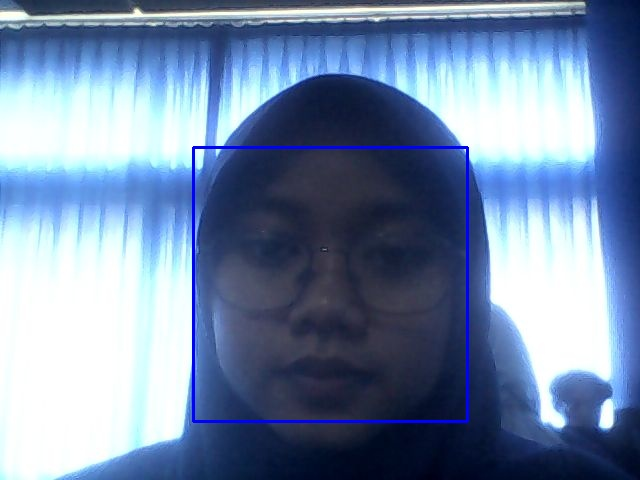

In [17]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

## **Blur Wajah Terdeteksi**

Text(0.5, 1.0, 'Gambar Blur')

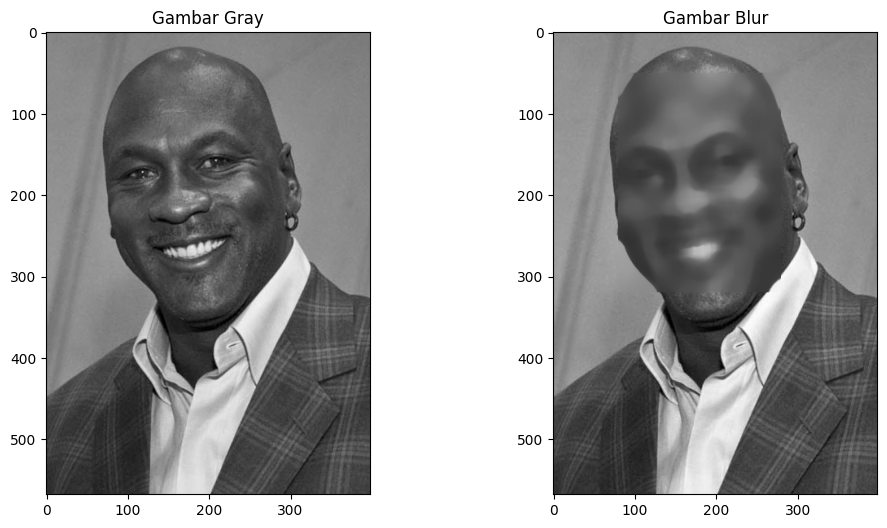

In [18]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar
image = cv2.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/facedet/mjordan.jpg')

# Gambar gray
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Tampilkan gambar gray
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Gray')

# Tentukan koordinat dan ukuran kotak ROI
x, y, w, h = 80, 50, 200, 270

# Ambil ROI dari gambar
roi = image[y:y+h, x:x+w]

# Ubah ROI menjadi skala abu-abu
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Terapkan medianBlur pada ROI
blurred_roi = cv2.medianBlur(gray_roi, 21)

# Masukkan kembali ROI yang telah di-blur ke dalam gambar asli
image[y:y+h, x:x+w] = cv2.cvtColor(blurred_roi, cv2.COLOR_GRAY2BGR)

# Konversi gambar kedua menjadi skala abu-abu
image_blur_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar asli dan yang telah di-blur
plt.subplot(1, 2, 2)
plt.imshow(image_blur_gray, cmap='gray')
plt.title('Gambar Blur')

## **Segmentasi Karakter KTP**

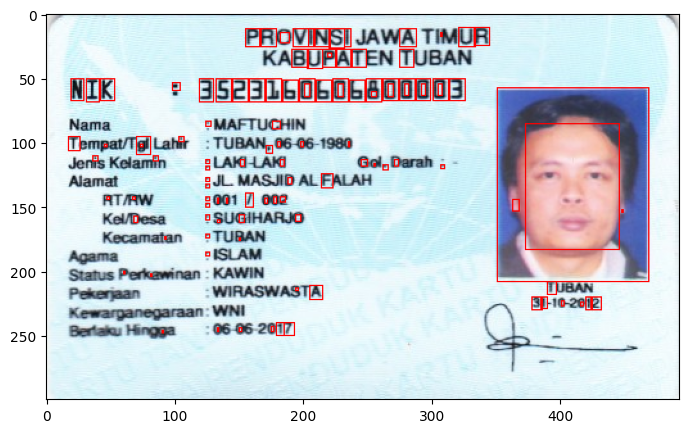

In [25]:
import cv2
import os

# load data
img = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More/ktp3.png')
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [52]:

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# load data
ktp = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More/ktp3.png')

# Convert the image to grayscale for edge detection
ktp_gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

ktp_gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
ktp_blur = cv.GaussianBlur(
                src=ktp_gray,
                ksize=(5, 5),
                sigmaX=0,
                sigmaY=0)

# Thresholding to create a binary image
ret, thresholded = cv2.threshold(ktp_blur, 100, 255, cv2.THRESH_OTSU)


# Closing to fill gaps between characters
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_closing)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

crop_image = contour_image[45:75, 115:330]
cv2.imwrite('NIK_crop.jpg', crop_image)
cv2_imshow(crop_image)

In [54]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training di Google Drive
DATADIR = "/content/drive/MyDrive/Semester 5/PCVK/Dataset"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)

    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)

X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

FileNotFoundError: ignored

In [55]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,
ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100
# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)
# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)
adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

SyntaxError: ignored